**K-Means algorithm from scratch - Student Performance in Exams dataset**

**Data Loading and Initial Exploration**

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
# Load the dataset
file_path = 'StudentsPerformance.csv'
students_data = pd.read_csv(file_path)

# Initial exploration of the dataset
initial_exploration = {
    "First 5 Rows": students_data.head(),
    "Data Shape": students_data.shape,
    "Data Types": students_data.dtypes,
    "Missing Values": students_data.isnull().sum()
}

initial_exploration


Saving StudentsPerformance.csv to StudentsPerformance.csv


{'First 5 Rows':    gender race/ethnicity parental level of education         lunch  \
 0  female        group B           bachelor's degree      standard   
 1  female        group C                some college      standard   
 2  female        group B             master's degree      standard   
 3    male        group A          associate's degree  free/reduced   
 4    male        group C                some college      standard   
 
   test preparation course  math score  reading score  writing score  
 0                    none          72             72             74  
 1               completed          69             90             88  
 2                    none          90             95             93  
 3                    none          47             57             44  
 4                    none          76             78             75  ,
 'Data Shape': (1000, 8),
 'Data Types': gender                         object
 race/ethnicity                 object
 parental l

**Basic Statistical Analysis**

In [ ]:
# Basic Statistical Analysis
statistical_summary = students_data.describe()

statistical_summary

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Data Visualization**

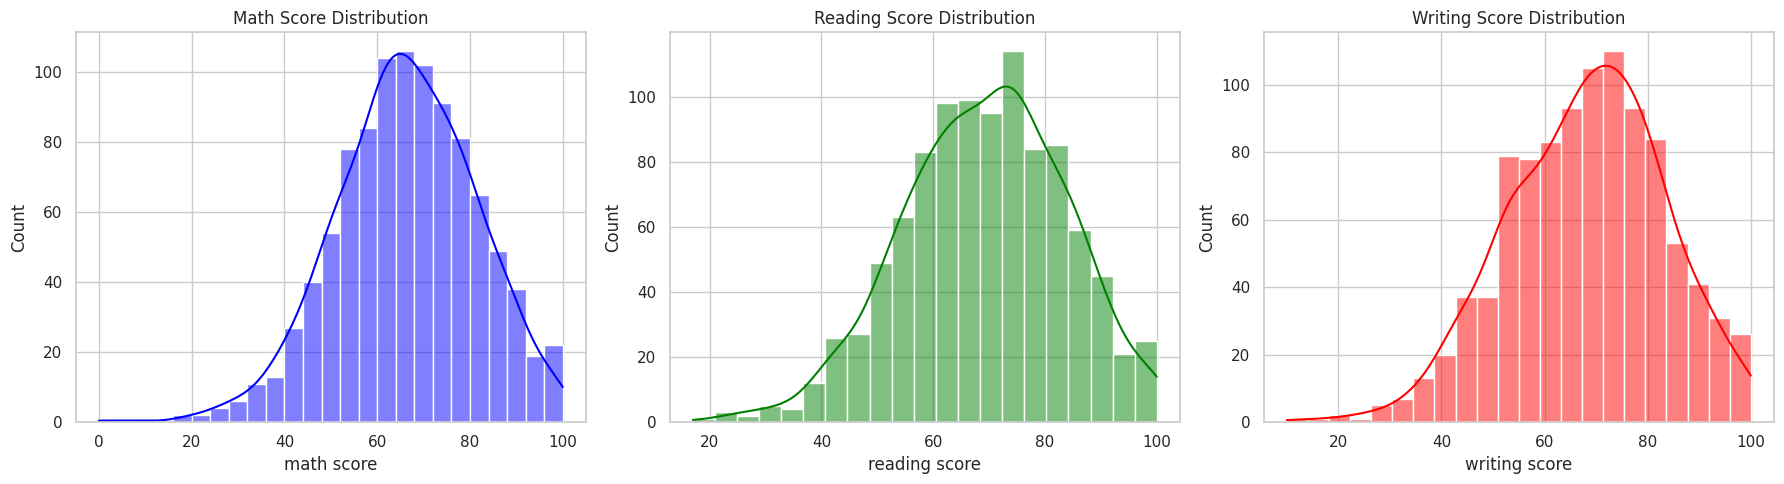

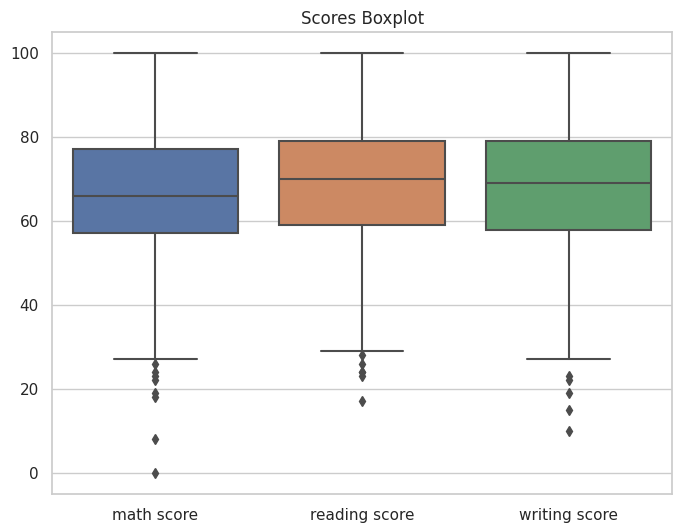

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating visualizations for the dataset
plt.figure(figsize=(18, 5))

# Histograms for scores
plt.subplot(1, 3, 1)
sns.histplot(students_data['math score'], kde=True, color='blue')
plt.title('Math Score Distribution')

plt.subplot(1, 3, 2)
sns.histplot(students_data['reading score'], kde=True, color='green')
plt.title('Reading Score Distribution')

plt.subplot(1, 3, 3)
sns.histplot(students_data['writing score'], kde=True, color='red')
plt.title('Writing Score Distribution')

plt.tight_layout()
plt.show()

# Boxplot for scores
plt.figure(figsize=(8, 6))
sns.boxplot(data=students_data[['math score', 'reading score', 'writing score']])
plt.title('Scores Boxplot')
plt.show()

**Data Preprocessing for K-means**

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# There are no missing values to handle, so we move to normalization and encoding

# Normalizing the numerical columns (scores)
scaler = StandardScaler()
students_data[['math score', 'reading score', 'writing score']] = scaler.fit_transform(students_data[['math score', 'reading score', 'writing score']])

# Encoding the categorical columns
label_encoder = LabelEncoder()
categorical_columns = students_data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    students_data[col] = label_encoder.fit_transform(students_data[col])

# Displaying the first few rows of the processed data
students_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,0.390024,0.193999,0.391492
1,0,2,4,1,0,0.192076,1.427476,1.313269
2,0,1,3,1,1,1.577711,1.770109,1.642475
3,1,0,0,0,1,-1.259543,-0.833899,-1.583744
4,1,2,4,1,1,0.653954,0.605158,0.457333


**Applying the K-means algorithm to our dataset**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

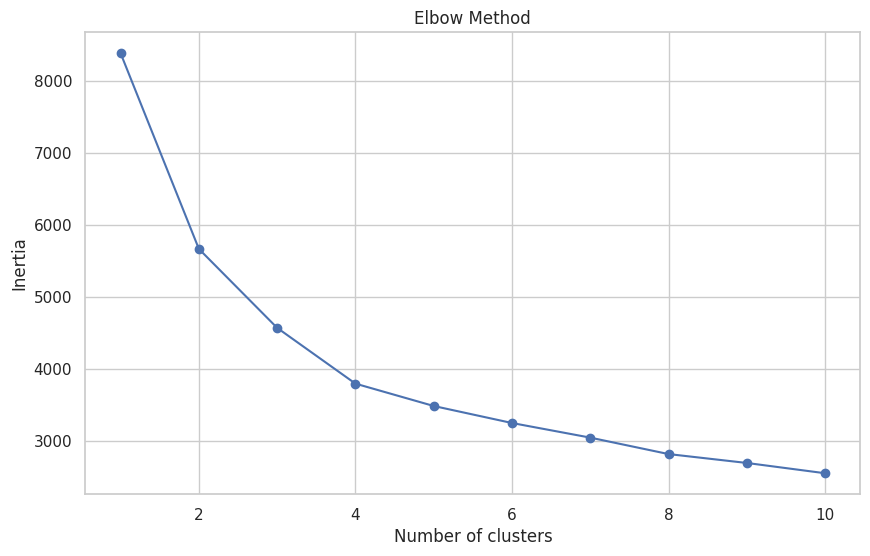

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Determining the optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(students_data)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

**Applying K-means clustering with 3 clusters**

In [ ]:
# Applying K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(students_data)

# Adding the cluster information to the original dataset for analysis
students_data['Cluster'] = clusters

# Displaying the first few rows with cluster assignments
clustered_data_head = students_data.head()

# Analyzing the characteristics of each cluster
cluster_summary = students_data.groupby('Cluster').mean()

clustered_data_head, cluster_summary

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(   gender  race/ethnicity  parental level of education  lunch  \
 0       0               1                            1      1   
 1       0               2                            4      1   
 2       0               1                            3      1   
 3       1               0                            0      0   
 4       1               2                            4      1   
 
    test preparation course  math score  reading score  writing score  Cluster  
 0                        1    0.390024       0.193999       0.391492        1  
 1                        0    0.192076       1.427476       1.313269        2  
 2                        1    1.577711       1.770109       1.642475        2  
 3                        1   -1.259543      -0.833899      -1.583744        1  
 4                        1    0.653954       0.605158       0.457333        2  ,
            gender  race/ethnicity  parental level of education     lunch  \
 Cluster                              

**Calculating the silhouette score for our clustering solution**

In [ ]:
from sklearn.metrics import silhouette_score

# Calculating the silhouette score
silhouette_avg = silhouette_score(students_data.drop('Cluster', axis=1), clusters)

# Silhouette score
silhouette_avg

0.2587883456269318

**Pair Plot**

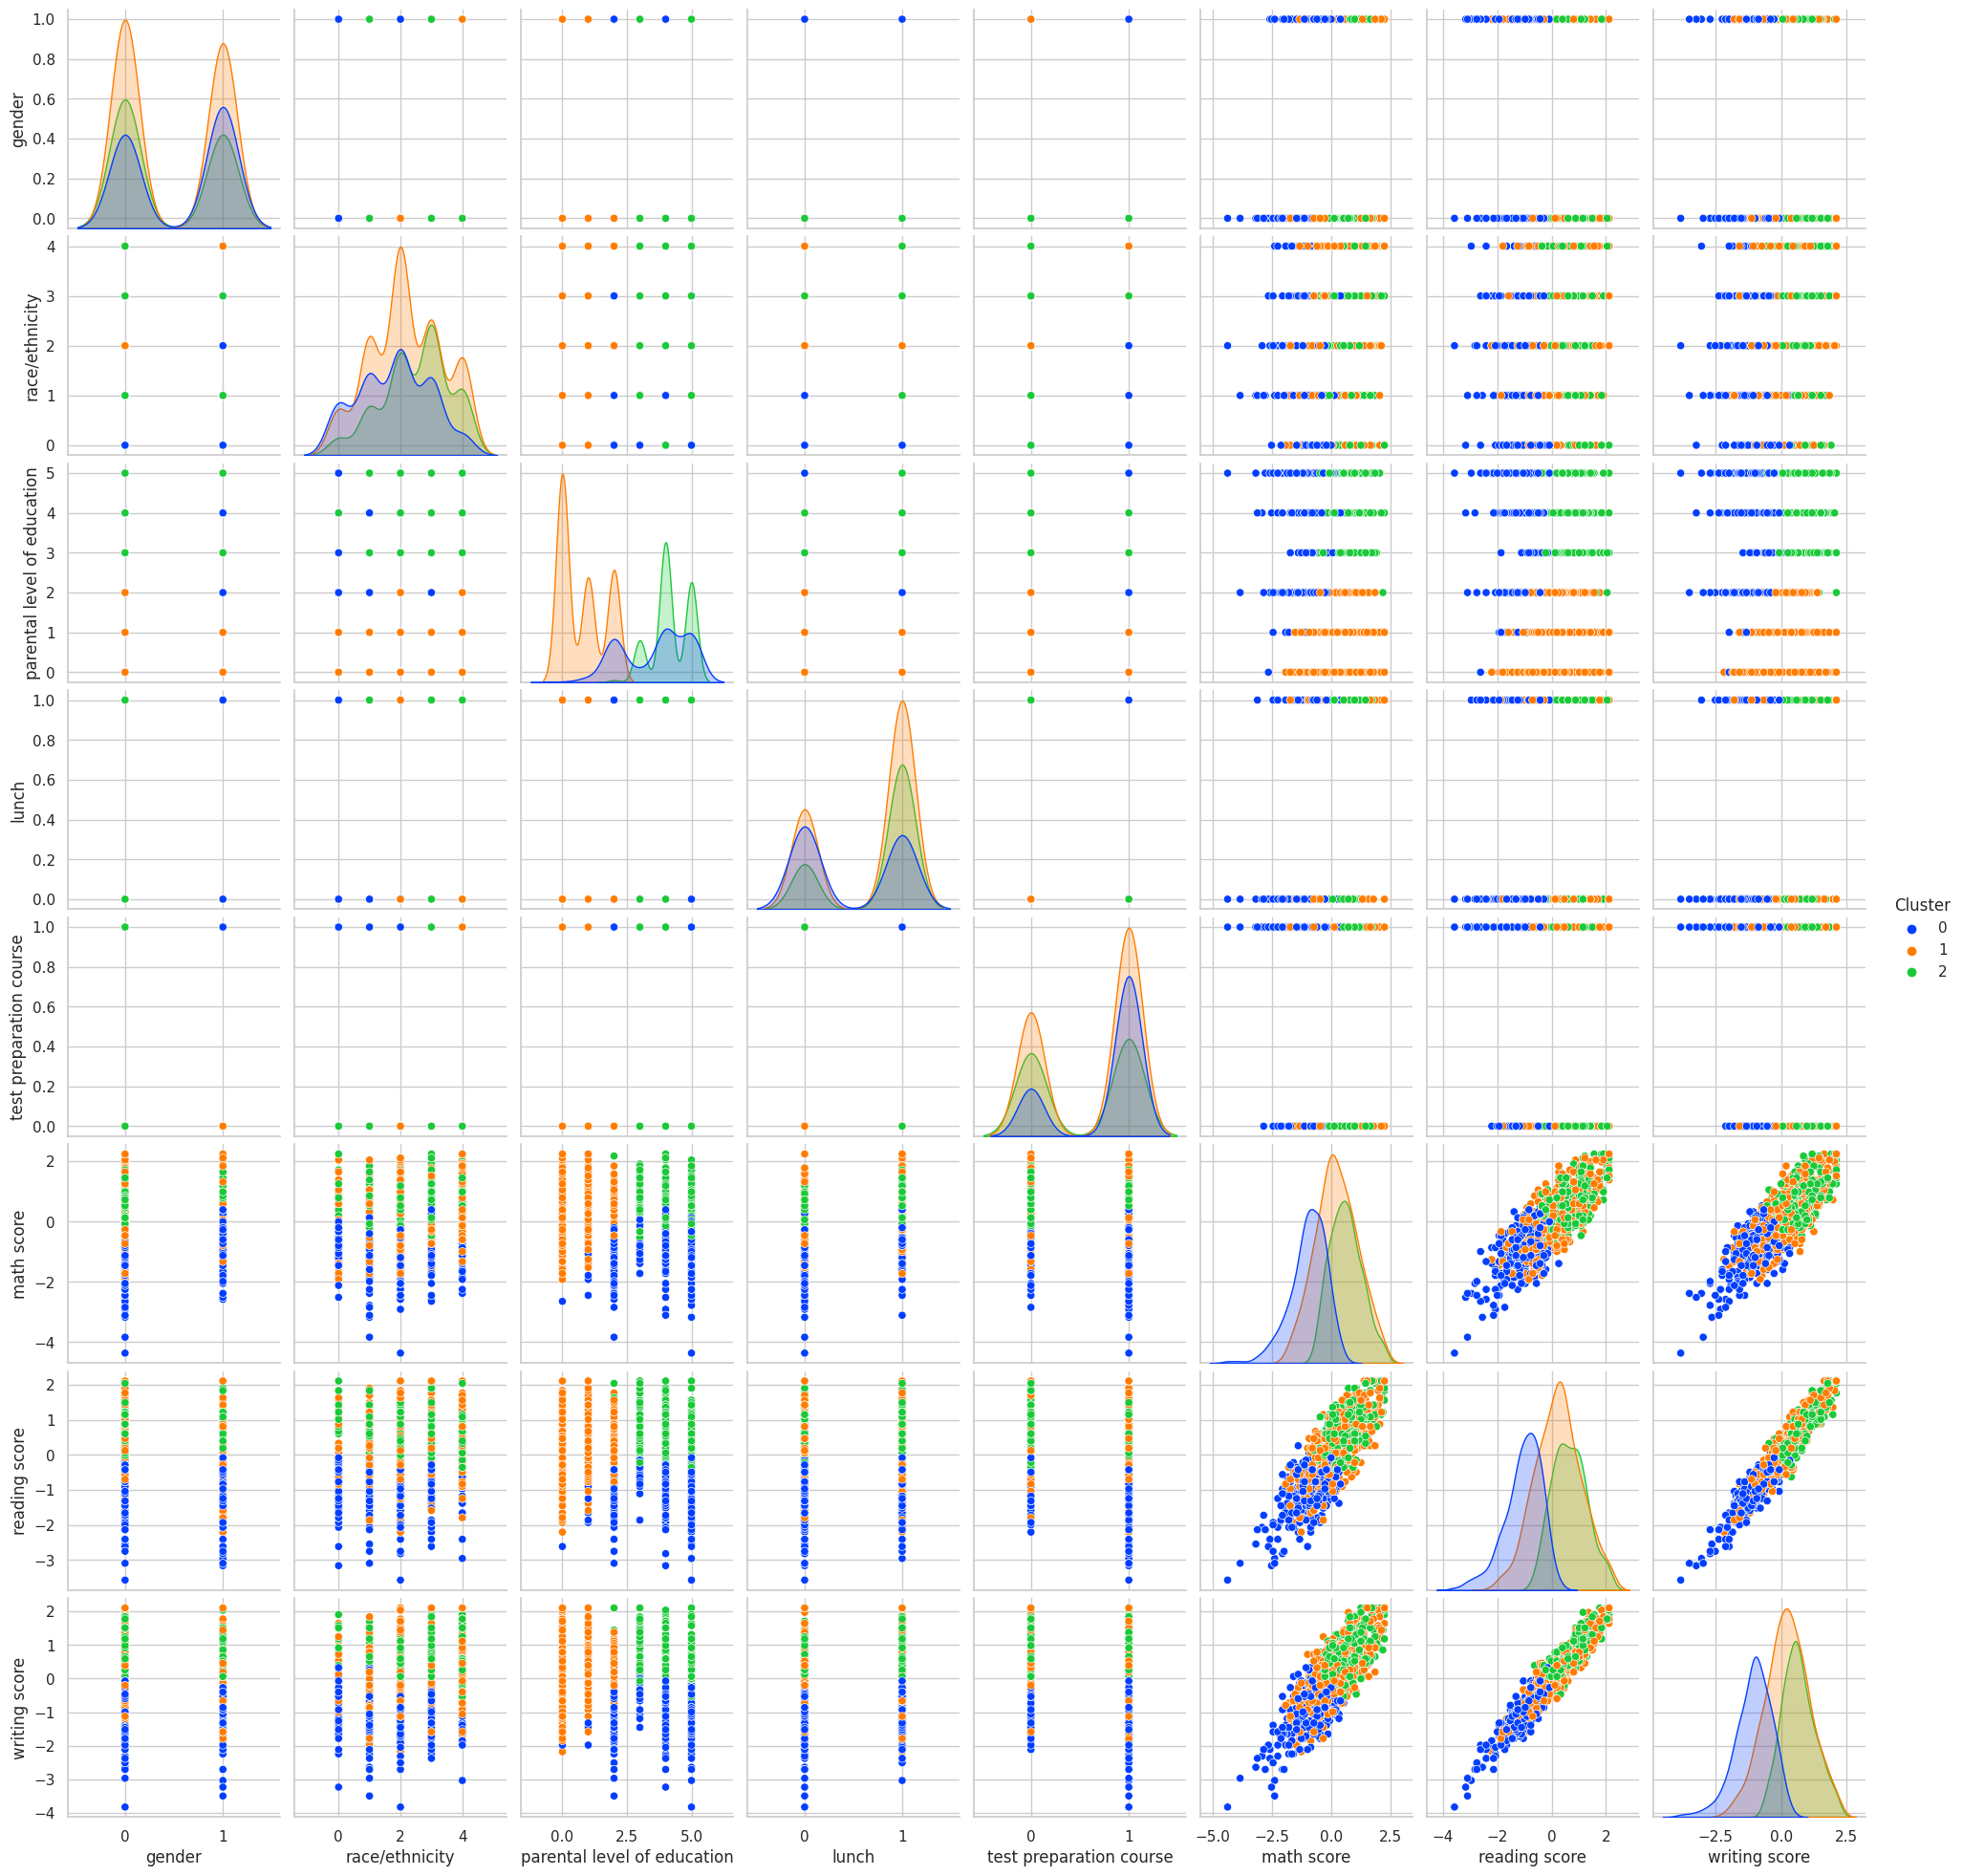

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot with hue set to the cluster
sns.pairplot(students_data, hue='Cluster', palette='bright')
plt.show()

**3D scatter plot focusing on the three score dimensions**

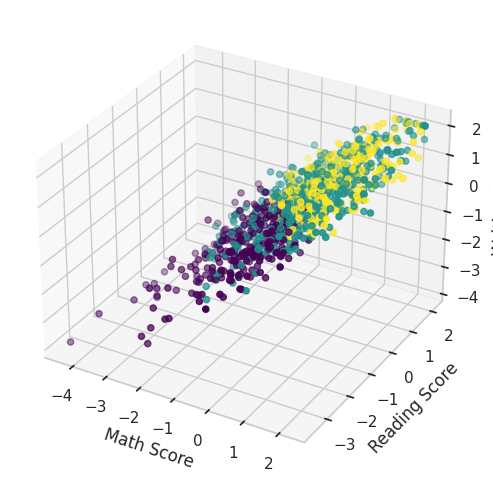

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using math score, reading score, and writing score
ax.scatter(students_data['math score'], students_data['reading score'], students_data['writing score'], c=students_data['Cluster'], cmap='viridis')
ax.set_xlabel('Math Score')
ax.set_ylabel('Reading Score')
ax.set_zlabel('Writing Score')
plt.show()

**Clustered bar charts**

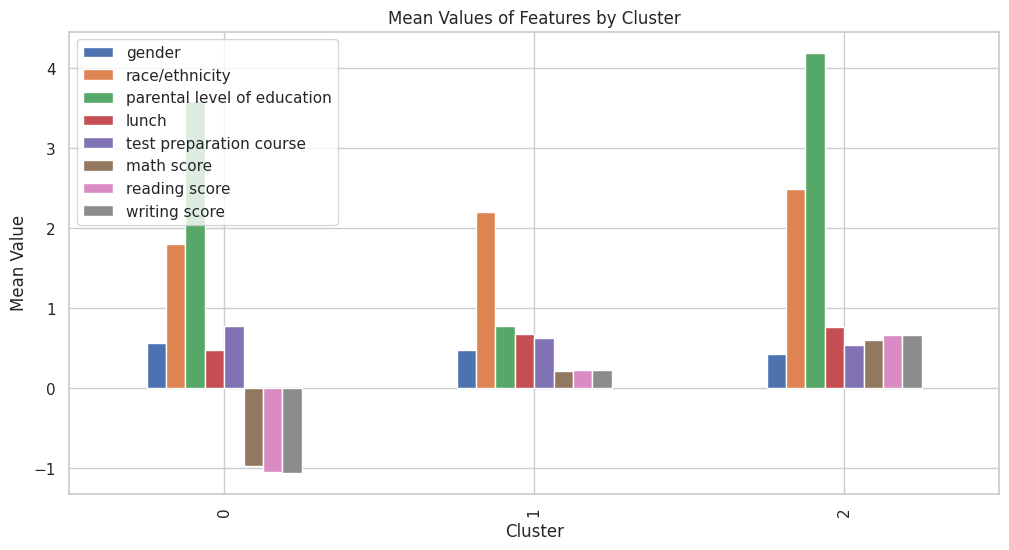

In [ ]:
# Mean values for each cluster
cluster_means = students_data.groupby('Cluster').mean()

# Plotting
cluster_means.plot(kind='bar', figsize=(12, 6))
plt.title('Mean Values of Features by Cluster')
plt.ylabel('Mean Value')
plt.xlabel('Cluster')
plt.show()


**Two of the score dimensions**

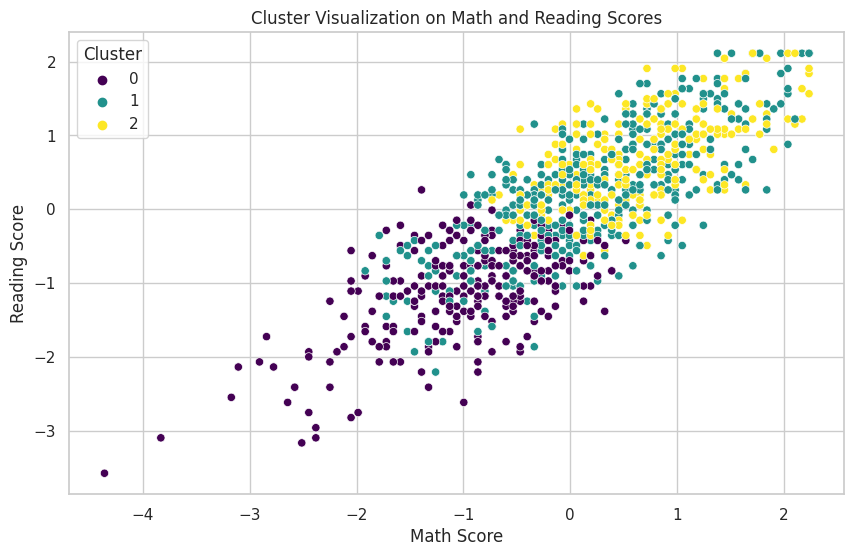

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose the features to plot (e.g., math score and reading score)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='math score', y='reading score', hue='Cluster', data=students_data, palette='viridis')
plt.title('Cluster Visualization on Math and Reading Scores')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.show()

**Evaluation and Interpretation (Summary):**

Each cluster represents a distinct group of students, differentiated by their academic performance and possibly by demographic factors.
Understanding these clusters helps in identifying patterns and trends in student performance, which can inform targeted educational strategies.

**Final Recommendations:**

Educational Strategies: Tailor teaching methods and resources to address the specific needs of each student cluster.
Intervention Programs: Develop targeted interventions for clusters that may represent students needing additional support.
Further Research: Explore deeper into the demographic factors and their impact on student performance.

**Reporting:**

A comprehensive report would include the methodology of data preprocessing, K-means clustering, evaluation metrics like silhouette score, and visualizations.
Interpretations of the clusters and their implications should be clearly articulated.
Conclude with recommendations and potential areas for further study.